In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set plot style
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

## Load Metrics Data

We'll look for `metrics.csv` in common locations (e.g., `artifacts_colab_run1/`).

In [8]:
# Try to find the metrics file automatically
possible_paths = [
    Path("../artifacts_colab_run5/metrics.csv"),  # Relative to notebooks dir
    Path("artifacts_colab_run5/metrics.csv"),     # Relative to project root
    Path("metrics.csv"),                          # Current directory
]

metrics_path = None
for p in possible_paths:
    if p.exists():
        metrics_path = p
        break

# If not found, ask user
if metrics_path is None:
    print("Could not find metrics.csv automatically.")
    user_input = input("Please enter path to metrics.csv: ").strip()
    if user_input:
        metrics_path = Path(user_input)

if metrics_path and metrics_path.exists():
    print(f"Loading metrics from: {metrics_path.resolve()}")
    df = pd.read_csv(metrics_path)
    
    # Determine output directory
    output_dir = metrics_path.parent
    print(f"Output directory for plots: {output_dir.resolve()}")
    
    # Ask for tag
    run_tag = input("Enter a tag for the output filenames (e.g., 'run3', press Enter for none): ").strip()
    
    display(df.head())
else:
    print("❌ Error: Metrics file not found. Please check the path.")

Loading metrics from: C:\Users\DELL\Documents\Proyectos\proyecto-grado\01-repos\prevenport-model\artifacts_colab_run5\metrics.csv


Output directory for plots: C:\Users\DELL\Documents\Proyectos\proyecto-grado\01-repos\prevenport-model\artifacts_colab_run5


,epoch,train_loss,train_acc,val_loss,val_acc,val_macro_f1,lr
0,0,0.943006,0.711828,0.361077,0.973048,0.197268,0.001
1,1,0.992065,0.719264,0.460521,0.973048,0.197268,0.001
2,2,0.991399,0.719264,0.429730,0.973048,0.197268,0.001
3,3,0.987723,0.719264,0.375354,0.973048,0.197268,0.001
4,4,0.988162,0.719264,0.449026,0.973048,0.197268,0.001


## Training vs Validation Loss

Saved: ..\artifacts_colab_run5\loss_plot_run5.png


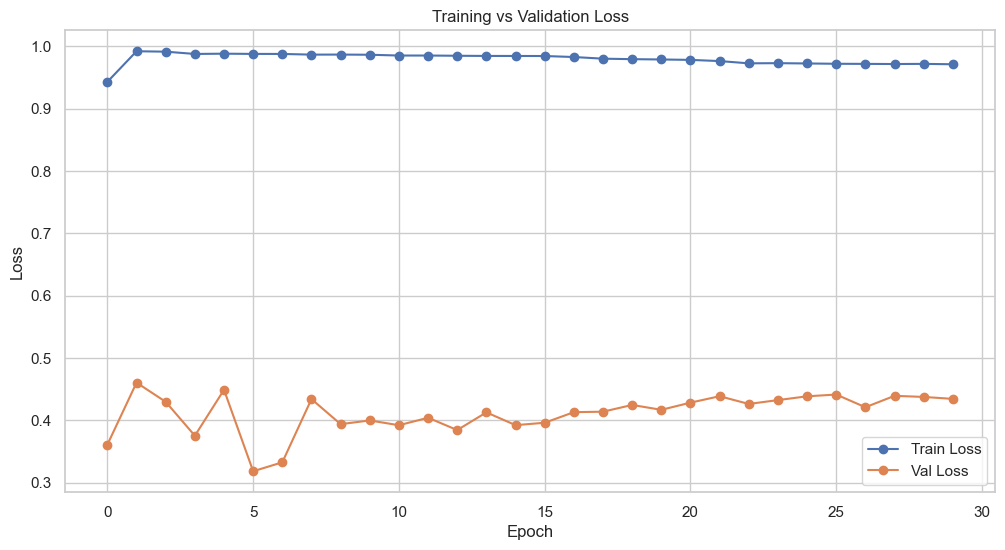

In [9]:
if 'df' in locals():
    plt.figure()
    plt.plot(df['epoch'], df['train_loss'], label='Train Loss', marker='o')
    plt.plot(df['epoch'], df['val_loss'], label='Val Loss', marker='o')
    plt.title('Training vs Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    # Save plot
    if 'output_dir' in locals() and output_dir.exists():
        suffix = f"_{run_tag}" if 'run_tag' in locals() and run_tag else ""
        save_path = output_dir / f"loss_plot{suffix}.png"
        plt.savefig(save_path)
        print(f"Saved: {save_path}")
        
    plt.show()

## Training vs Validation Accuracy

Saved: ..\artifacts_colab_run5\accuracy_plot_run5.png


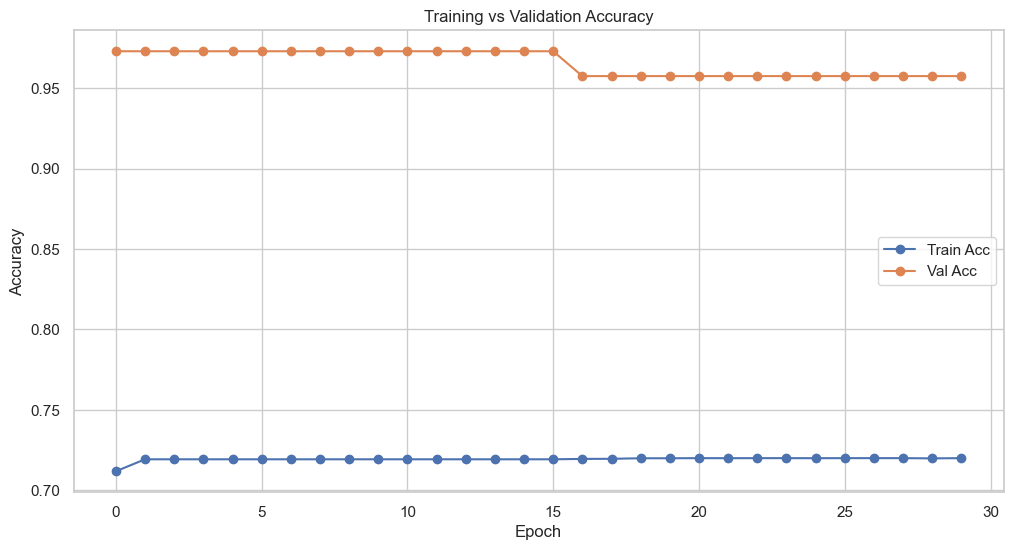

In [10]:
if 'df' in locals():
    plt.figure()
    plt.plot(df['epoch'], df['train_acc'], label='Train Acc', marker='o')
    plt.plot(df['epoch'], df['val_acc'], label='Val Acc', marker='o')
    plt.title('Training vs Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # Save plot
    if 'output_dir' in locals() and output_dir.exists():
        suffix = f"_{run_tag}" if 'run_tag' in locals() and run_tag else ""
        save_path = output_dir / f"accuracy_plot{suffix}.png"
        plt.savefig(save_path)
        print(f"Saved: {save_path}")

    plt.show()

## Validation Macro F1 Score

Saved: ..\artifacts_colab_run5\f1_score_plot_run5.png


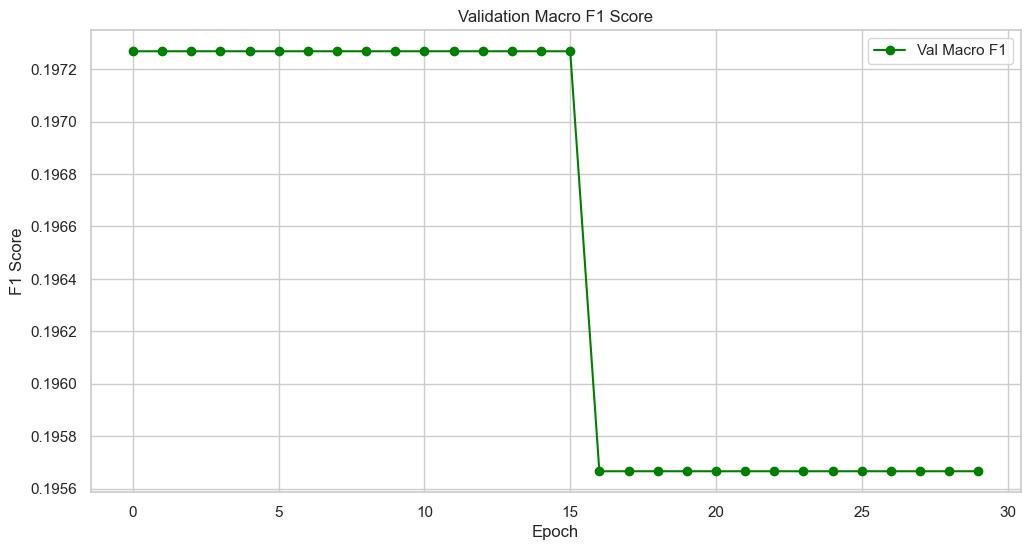

In [11]:
if 'df' in locals() and 'val_macro_f1' in df.columns:
    plt.figure()
    plt.plot(df['epoch'], df['val_macro_f1'], label='Val Macro F1', color='green', marker='o')
    plt.title('Validation Macro F1 Score')
    plt.xlabel('Epoch')
    plt.ylabel('F1 Score')
    plt.legend()
    
    # Save plot
    if 'output_dir' in locals() and output_dir.exists():
        suffix = f"_{run_tag}" if 'run_tag' in locals() and run_tag else ""
        save_path = output_dir / f"f1_score_plot{suffix}.png"
        plt.savefig(save_path)
        print(f"Saved: {save_path}")

    plt.show()

## Learning Rate Schedule

Saved: ..\artifacts_colab_run5\lr_plot_run5.png


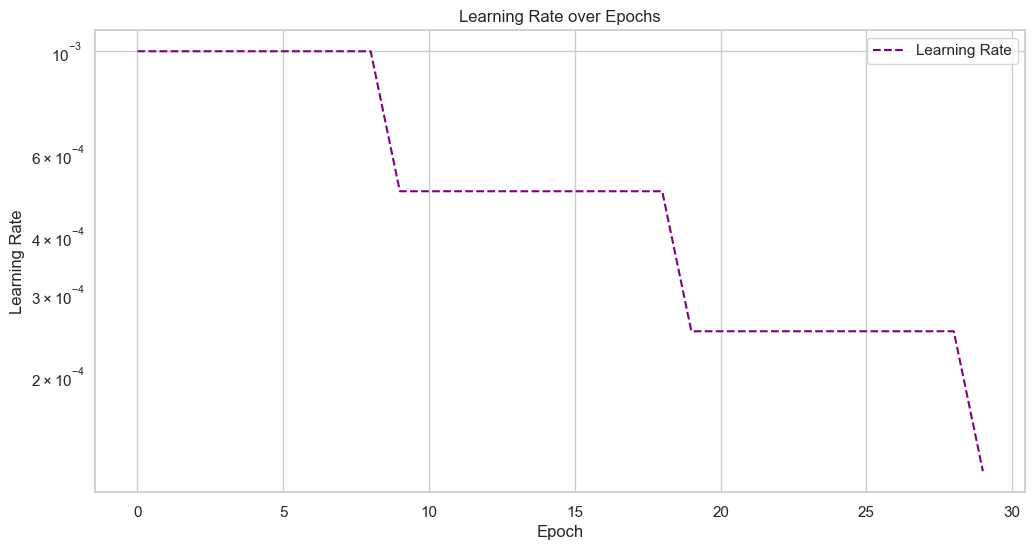

In [12]:
if 'df' in locals() and 'lr' in df.columns:
    plt.figure()
    plt.plot(df['epoch'], df['lr'], label='Learning Rate', color='purple', linestyle='--')
    plt.title('Learning Rate over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Learning Rate')
    plt.yscale('log')
    plt.legend()
    
    # Save plot
    if 'output_dir' in locals() and output_dir.exists():
        suffix = f"_{run_tag}" if 'run_tag' in locals() and run_tag else ""
        save_path = output_dir / f"lr_plot{suffix}.png"
        plt.savefig(save_path)
        print(f"Saved: {save_path}")

    plt.show()